# Import necessary libraries

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.ensemble import GradientBoostingRegressor
from mlxtend.frequent_patterns import fpgrowth, association_rules
from sklearn.cluster import MiniBatchKMeans, KMeans
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the dataset
file_path = "Census.csv"
data = pd.read_csv(file_path)

In [3]:
# Display the first few rows to understand the structure of the dataset
print("First few rows of the dataset:")
print(data.head())

First few rows of the dataset:
   Person ID     Region Residence Type  Family Composition  Population Base  \
0    7394816  E12000001              H                   2                1   
1    7394832  E12000001              H                   3                1   
2    7394719  E12000001              H                   2                1   
3    7394840  E12000001              H                   1                1   
4    7394711  E12000001              H                   2                1   

   Sex  Age  Marital Status  Student  Country of Birth  Health  Ethnic Group  \
0    2    6               2        2                 1       2             1   
1    2    1               1        2                 1       2             1   
2    1    7               2        2                 1       1             1   
3    2    6               4        2                 1       3             1   
4    1    1               1        1                 1       1             1   

   Religion  

# Data Preprocessing

In [4]:
# Check for null values
print("\nSummary of null values in each column:")
print(data.isnull().sum())


Summary of null values in each column:
Person ID                         0
Region                            0
Residence Type                    0
Family Composition                0
Population Base                   0
Sex                               0
Age                               0
Marital Status                    0
Student                           0
Country of Birth                  0
Health                            0
Ethnic Group                      0
Religion                          0
Economic Activity                 0
Occupation                        0
Industry                          0
Hours worked per week             0
No of hours                  302321
Approximated Social Grade         0
dtype: int64


In [5]:
# Drop rows with null values
data_cleaned = data.dropna()
print(f"\nNumber of rows after dropping null values: {len(data_cleaned)}")


Number of rows after dropping null values: 267419


In [6]:
# Check for duplicate rows
print(f"\nNumber of duplicate rows: {data_cleaned.duplicated().sum()}")


Number of duplicate rows: 0


In [7]:
# Drop duplicate rows
data_cleaned = data_cleaned.drop_duplicates()
print(f"Number of rows after removing duplicates: {len(data_cleaned)}")

Number of rows after removing duplicates: 267419


In [8]:
# Display basic information about the cleaned dataset
print("\nCleaned dataset summary:")
print(data_cleaned.info())


Cleaned dataset summary:
<class 'pandas.core.frame.DataFrame'>
Index: 267419 entries, 302321 to 569739
Data columns (total 19 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Person ID                  267419 non-null  int64  
 1   Region                     267419 non-null  object 
 2   Residence Type             267419 non-null  object 
 3   Family Composition         267419 non-null  int64  
 4   Population Base            267419 non-null  int64  
 5   Sex                        267419 non-null  int64  
 6   Age                        267419 non-null  int64  
 7   Marital Status             267419 non-null  int64  
 8   Student                    267419 non-null  int64  
 9   Country of Birth           267419 non-null  int64  
 10  Health                     267419 non-null  int64  
 11  Ethnic Group               267419 non-null  int64  
 12  Religion                   267419 non-null  int64  
 13  Eco

# Task 1: Descriptive Analytics

In [9]:
# Display basic statistics for all attributes
print("Basic Statistics for All Attributes:")
data.describe()

Basic Statistics for All Attributes:


,Person ID,Family Composition,Population Base,Sex,Age,Marital Status,Student,Country of Birth,Health,Ethnic Group,Religion,Economic Activity,Occupation,Industry,Hours worked per week,No of hours,Approximated Social Grade
count,5.697400e+05,569740.00000,569740.000000,569740.000000,569740.000000,569740.000000,569740.000000,569740.000000,569740.000000,569740.000000,569740.000000,569740.000000,569740.000000,569740.000000,569740.000000,267419.000000,569740.000000
mean,7.679353e+06,2.01187,1.018731,1.507551,3.978676,1.856201,1.777904,1.016237,1.658323,1.191247,2.419384,0.685597,1.240982,2.459843,-3.487106,35.234789,0.034123
std,1.644699e+05,2.35879,0.159058,0.499943,2.219494,1.125021,0.415656,1.153095,1.486599,1.391857,2.493065,5.265470,6.521825,7.398951,5.887538,13.520881,4.862673
min,7.394483e+06,-9.00000,1.000000,1.000000,1.000000,1.000000,1.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,1.000000,-9.000000
25%,7.536918e+06,2.00000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-9.000000,-9.000000,-9.000000,27.000000,1.000000
50%,7.679352e+06,2.00000,1.000000,2.000000,4.000000,2.000000,2.000000,1.000000,2.000000,1.000000,2.000000,1.000000,3.000000,4.000000,-9.000000,37.000000,2.000000
75%,7.821787e+06,3.00000,1.000000,2.000000,6.000000,2.000000,2.000000,1.000000,2.000000,1.000000,2.000000,5.000000,6.000000,8.000000,3.000000,45.000000,3.000000
max,7.964223e+06,6.00000,3.000000,2.000000,8.000000,5.000000,2.000000,2.000000,5.000000,5.000000,9.000000,9.000000,9.000000,12.000000,4.000000,60.000000,4.000000


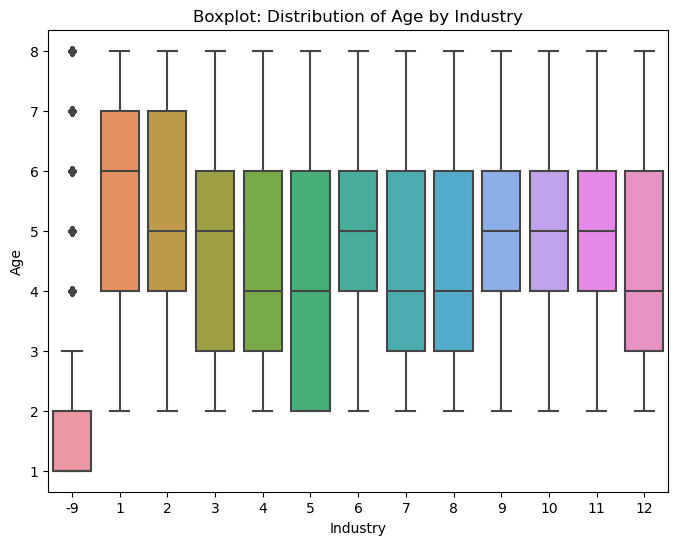

In [10]:
# Boxplot: Distribution of Age by Industry
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='Industry', y='Age')
plt.title('Boxplot: Distribution of Age by Industry')
plt.xlabel('Industry')
plt.ylabel('Age')
plt.show()

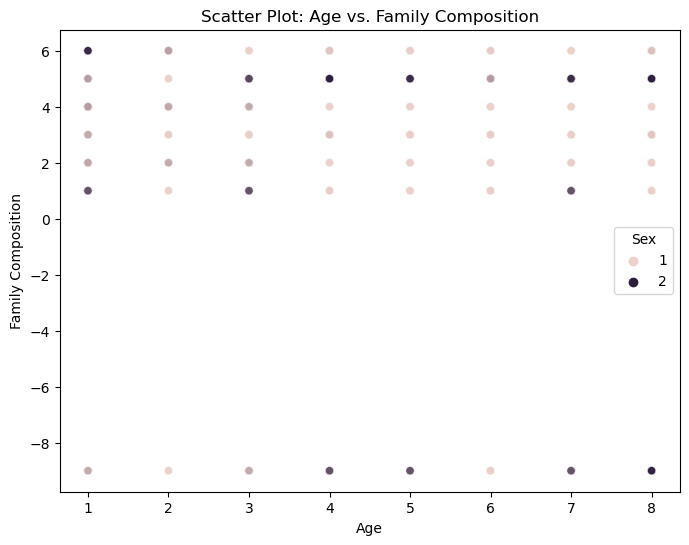

In [11]:
# Scatter Plot: Relationship between Age and Family Composition
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='Age', y='Family Composition', hue='Sex', alpha=0.7)
plt.title('Scatter Plot: Age vs. Family Composition')
plt.xlabel('Age')
plt.ylabel('Family Composition')
plt.show()

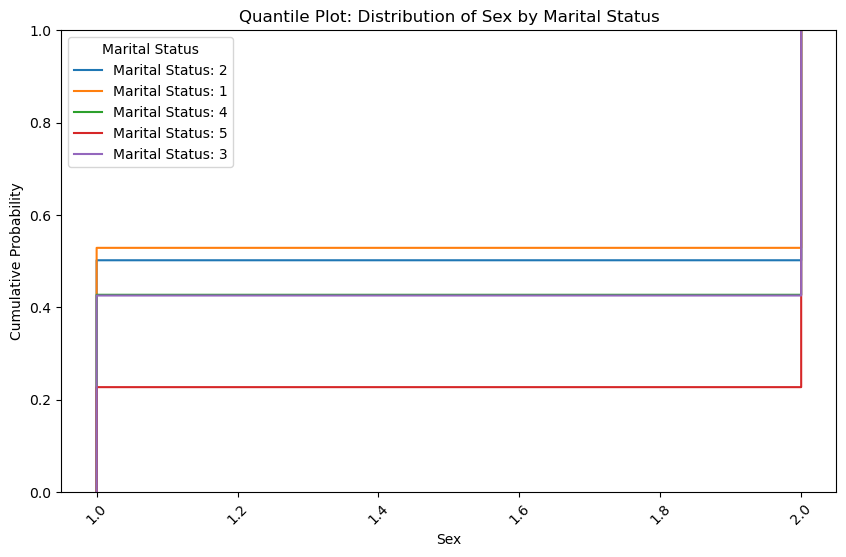

In [12]:
# Plot ECDF for Sex by Marital Status
plt.figure(figsize=(10, 6))
for marital_status in data['Marital Status'].unique():
    subset = data[data['Marital Status'] == marital_status]
    sns.ecdfplot(data=subset, x='Sex', label=f'Marital Status: {marital_status}')

plt.title('Quantile Plot: Distribution of Sex by Marital Status')
plt.xlabel('Sex')
plt.ylabel('Cumulative Probability')
plt.legend(title='Marital Status')
plt.xticks(rotation=45)
plt.show()

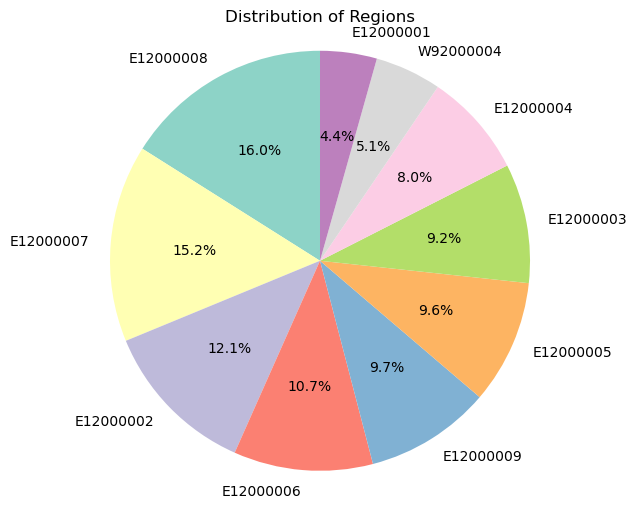

In [13]:
# Pie plot for categorical variable distribution
plt.figure(figsize=(8, 6))
region_counts = data_cleaned['Region'].value_counts()
plt.pie(region_counts, labels=region_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set3', len(region_counts)))
plt.title('Distribution of Regions')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.show()

Sex            1      2
Region                 
E12000001   6102   5572
E12000002  17170  15237
E12000003  12877  11709
E12000004  11337  10132
E12000005  13413  12126
E12000006  15338  13322
E12000007  21680  18925
E12000008  22911  19987
E12000009  13603  12300
W92000004   7184   6494


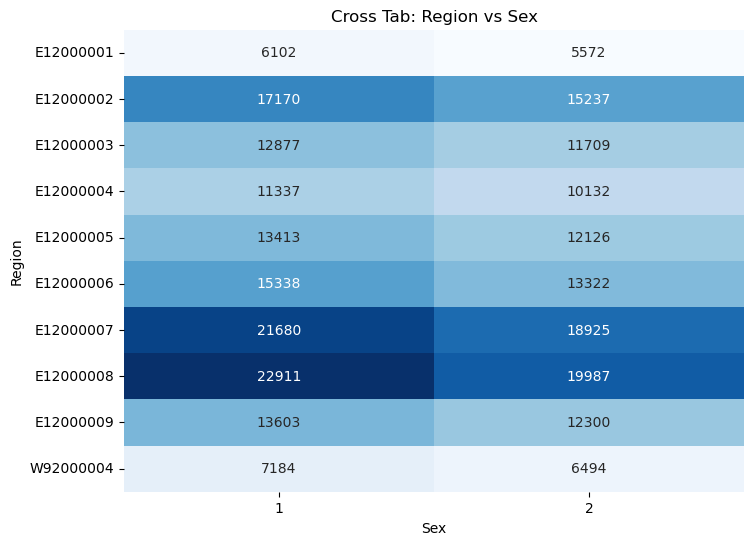

In [14]:
# Cross-tabulation between 'Region' and 'Sex'
cross_tab = pd.crosstab(data_cleaned['Region'], data_cleaned['Sex'])
print(cross_tab)

# Plot the cross-tab as a heatmap for better visualization
plt.figure(figsize=(8, 6))
sns.heatmap(cross_tab, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.title('Cross Tab: Region vs Sex')
plt.xlabel('Sex')
plt.ylabel('Region')
plt.show()

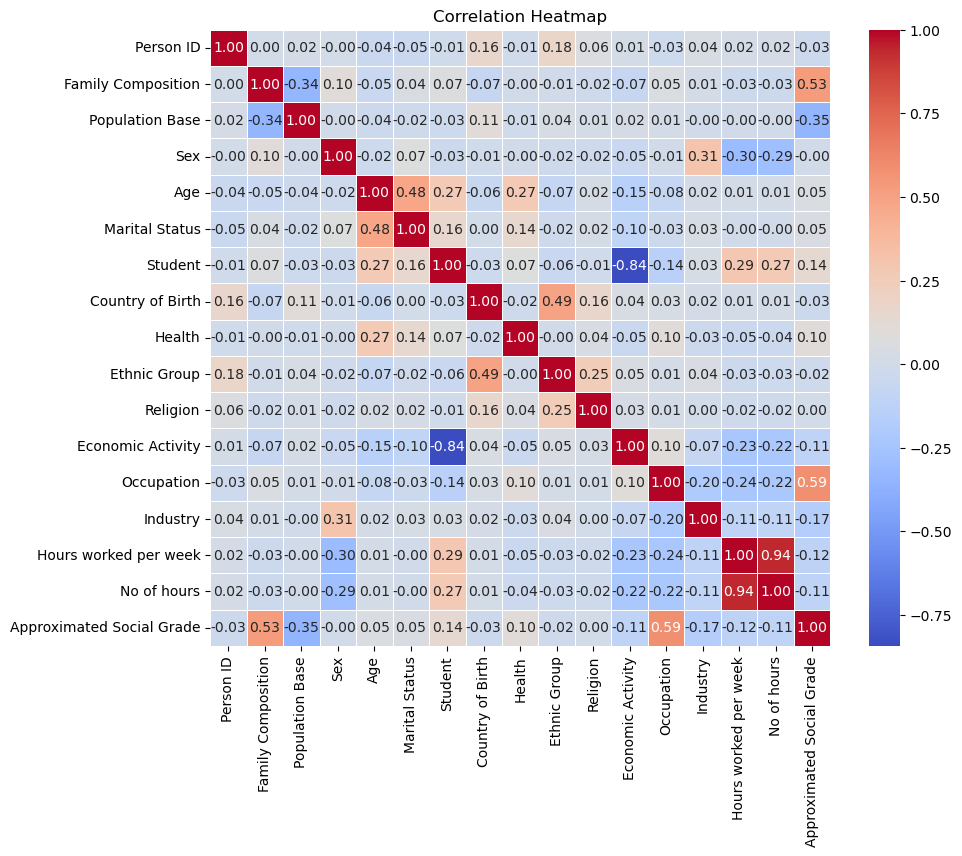

In [15]:
# Select only numeric columns from the dataset
numeric_data = data_cleaned.select_dtypes(include=['number'])

# Calculate the correlation matrix
corr_matrix = numeric_data.corr()

# Heatmap to visualize correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


# Task 2: Classification

In [16]:
# Encode categorical columns using LabelEncoder
label_encoder = LabelEncoder()

In [17]:
# Encoding categorical columns
data_cleaned['Region'] = label_encoder.fit_transform(data_cleaned['Region'])
data_cleaned['Residence Type'] = label_encoder.fit_transform(data_cleaned['Residence Type'])
data_cleaned['Sex'] = label_encoder.fit_transform(data_cleaned['Sex'])
data_cleaned['Marital Status'] = label_encoder.fit_transform(data_cleaned['Marital Status'])
data_cleaned['Country of Birth'] = label_encoder.fit_transform(data_cleaned['Country of Birth'])
data_cleaned['Ethnic Group'] = label_encoder.fit_transform(data_cleaned['Ethnic Group'])
data_cleaned['Religion'] = label_encoder.fit_transform(data_cleaned['Religion'])
data_cleaned['Economic Activity'] = label_encoder.fit_transform(data_cleaned['Economic Activity'])
data_cleaned['Occupation'] = label_encoder.fit_transform(data_cleaned['Occupation'])
data_cleaned['Industry'] = label_encoder.fit_transform(data_cleaned['Industry'])
data_cleaned['Approximated Social Grade'] = label_encoder.fit_transform(data_cleaned['Approximated Social Grade'])

In [18]:
# Select features (X) and target (y)
X = data_cleaned.drop(columns=['Person ID', 'Approximated Social Grade'])
y = data_cleaned['Approximated Social Grade']

In [19]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
# Feature scaling (important for models like SVM, KNN)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [21]:
# SVM Classifier Model
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)

In [22]:
# Naive Bayes Classifier Model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_predictions = nb_model.predict(X_test)

In [23]:
# KNN Classifier Model
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_predictions = knn_model.predict(X_test)

In [62]:
# Function to evaluate classification metrics
def evaluate_classification(predictions, y_test):
    accuracy = accuracy_score(y_test, predictions) * 100  # Accuracy in percentage
    precision = precision_score(y_test, predictions, average='weighted', zero_division=1)
    recall = recall_score(y_test, predictions, average='weighted', zero_division=1)
    f1 = f1_score(y_test, predictions, average='weighted', zero_division=1)
    return accuracy, precision, recall, f1

In [63]:
# Evaluate each classifier
svm_accuracy, svm_precision, svm_recall, svm_f1 = evaluate_classification(svm_predictions, y_test)
nb_accuracy, nb_precision, nb_recall, nb_f1 = evaluate_classification(nb_predictions, y_test)
knn_accuracy, knn_precision, knn_recall, knn_f1 = evaluate_classification(knn_predictions, y_test)

In [64]:
# Display results for each model
print(f"SVM Classifier:")
print(f"Accuracy: {svm_accuracy:.2f}%")
print(f"Precision: {svm_precision:.4f}")
print(f"Recall: {svm_recall:.4f}")
print(f"F1-Score: {svm_f1:.4f}\n")

SVM Classifier:
Accuracy: 0.64%
Precision: 0.9744
Recall: 0.0064
F1-Score: 0.0003



In [65]:
print(f"Naive Bayes Classifier:")
print(f"Accuracy: {nb_accuracy:.2f}%")
print(f"Precision: {nb_precision:.4f}")
print(f"Recall: {nb_recall:.4f}")
print(f"F1-Score: {nb_f1:.4f}\n")

Naive Bayes Classifier:
Accuracy: 0.69%
Precision: 0.9746
Recall: 0.0069
F1-Score: 0.0007



In [66]:
print(f"KNN Classifier:")
print(f"Accuracy: {knn_accuracy:.2f}%")
print(f"Precision: {knn_precision:.4f}")
print(f"Recall: {knn_recall:.4f}")
print(f"F1-Score: {knn_f1:.4f}\n")

KNN Classifier:
Accuracy: 0.63%
Precision: 0.9744
Recall: 0.0063
F1-Score: 0.0003



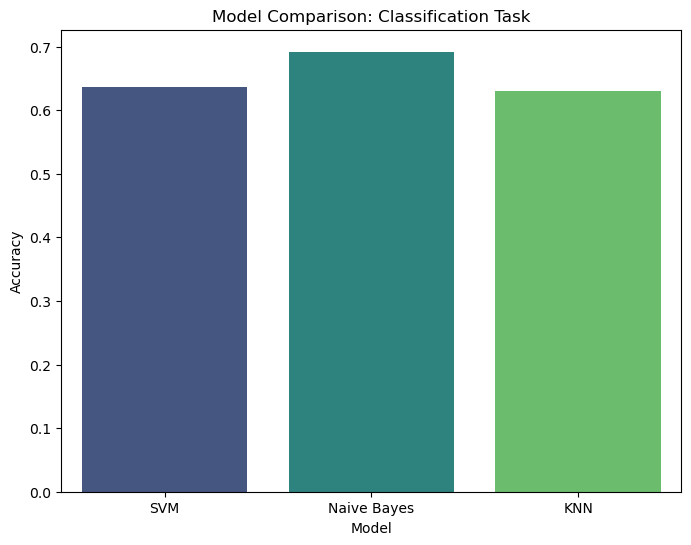

In [67]:
# Comparison plot for Classification
models = ['SVM', 'Naive Bayes', 'KNN']
accuracies = [svm_accuracy, nb_accuracy, knn_accuracy]

plt.figure(figsize=(8, 6))
sns.barplot(x=models, y=accuracies, palette='viridis')
plt.title('Model Comparison: Classification Task')
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.show()

# Task 3: Regression

In [27]:
# Select features for training (excluding 'No of hours' from the features)
X = data_cleaned.drop(columns=['No of hours'])
y = data_cleaned['No of hours']

In [28]:
# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
# Initialize models
ridge_model = Ridge()
gb_model = GradientBoostingRegressor(random_state=42)

In [30]:
# Train the Ridge Regression model
ridge_model.fit(X_train, y_train)

Ridge()

In [31]:
# Train the Gradient Boosting Regressor model
gb_model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [32]:
# Predictions
ridge_predictions = ridge_model.predict(X_test)
gb_predictions = gb_model.predict(X_test)

In [33]:
# Calculate evaluation metrics
def calculate_metrics(y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    return r2, mse, rmse, mae

In [34]:
# 1. Ridge Regression metrics
ridge_r2, ridge_mse, ridge_rmse, ridge_mae = calculate_metrics(y_test, ridge_predictions)

In [35]:
# 2. Gradient Boosting Regression metrics
gb_r2, gb_mse, gb_rmse, gb_mae = calculate_metrics(y_test, gb_predictions)

In [68]:
# Display Ridge Regression metrics
print(f"\nRidge Regression Metrics:")
print(f"R²: {ridge_r2:.4f}")
print(f"MSE: {ridge_mse:.4f}")
print(f"RMSE: {ridge_rmse:.4f}")
print(f"MAE: {ridge_mae:.4f}")


Ridge Regression Metrics:
R²: 0.8765
MSE: 22.5637
RMSE: 4.7501
MAE: 4.0785


In [69]:
# Display Gradient Boosting Regression metrics
print(f"\nGradient Boosting Regression Metrics:")
print(f"R²: {gb_r2:.4f}")
print(f"MSE: {gb_mse:.4f}")
print(f"RMSE: {gb_rmse:.4f}")
print(f"MAE: {gb_mae:.4f}")


Gradient Boosting Regression Metrics:
R²: 0.8770
MSE: 22.4640
RMSE: 4.7396
MAE: 4.0726


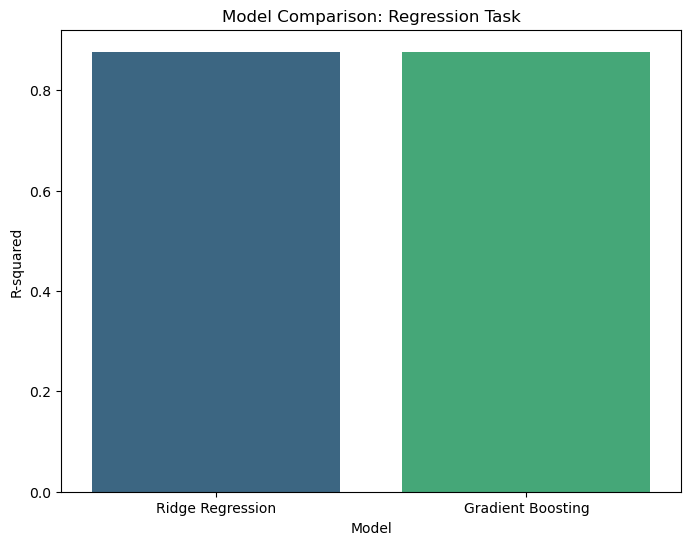

In [70]:
# Comparison plot for Regression
models_reg = ['Ridge Regression', 'Gradient Boosting']
r2_scores = [ridge_r2, gb_r2]

plt.figure(figsize=(8, 6))
sns.barplot(x=models_reg, y=r2_scores, palette='viridis')
plt.title('Model Comparison: Regression Task')
plt.ylabel('R-squared')
plt.xlabel('Model')
plt.show()

# Task 4: Association Rule Mining

In [37]:
# Select relevant columns for Association Rule Mining
columns_of_interest = [
    'Region', 'Residence Type', 'Family Composition', 'Population Base', 'Sex', 'Age',
    'Marital Status', 'Student', 'Country of Birth', 'Health', 'Ethnic Group',
    'Religion', 'Economic Activity', 'Occupation', 'Industry', 'Hours worked per week'
]

In [38]:
# Subset the dataset
data_subset = data[columns_of_interest]

In [39]:
# Ensure all columns are treated as categorical
for col in data_subset.columns:
    data_subset[col] = data_subset[col].astype(str)

In [40]:
# Convert categorical data into one-hot encoded format for FP-Growth
data_encoded = pd.get_dummies(data_subset)

In [41]:
# Apply FP-Growth to find frequent itemsets
frequent_itemsets = fpgrowth(data_encoded, min_support=0.1, use_colnames=True)

In [42]:
# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

In [43]:
# Sort rules by confidence and display top 5
rules_sorted = rules.sort_values('confidence', ascending=False)
print("\nTop 5 Association Rules:")
print(rules_sorted.head())


Top 5 Association Rules:
                                              antecedents  \
292578  (Student_1, Age_1, Economic Activity_-9, Hours...   
424987  (Family Composition_2, Age_1, Marital Status_1...   
425039  (Family Composition_2, Residence Type_H, Hours...   
425038  (Family Composition_2, Residence Type_H, Age_1...   
425037  (Family Composition_2, Residence Type_H, Age_1...   

                                     consequents  antecedent support  \
292578              (Industry_-9, Occupation_-9)            0.145322   
424987  (Residence Type_H, Economic Activity_-9)            0.107328   
425039                                   (Age_1)            0.100346   
425038                (Hours worked per week_-9)            0.100346   
425037                    (Economic Activity_-9)            0.100346   

        consequent support   support  confidence      lift  leverage  \
292578            0.263250  0.145322         1.0  3.798672  0.107066   
424987            0.196683  0.

# Task 5: Clustering

In [44]:
X = data_cleaned.drop(columns=['Person ID', 'Approximated Social Grade'])

In [45]:
# Standardizing the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [46]:
# KMeans Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

In [47]:
# Evaluate KMeans clustering using silhouette score
silhouette_avg = silhouette_score(X_scaled, kmeans_labels)
print(f"Silhouette Score for KMeans: {silhouette_avg:.2f}")

Silhouette Score for KMeans: 0.12


In [53]:
# MiniBatchKMeans Clustering
mb_kmeans = MiniBatchKMeans(n_clusters=3, random_state=42, batch_size=1000)
mb_kmeans_labels = mb_kmeans.fit_predict(X_scaled)

In [56]:
# Evaluate MiniBatchKMeans using silhouette score
silhouette_avg_mb_kmeans = silhouette_score(X_scaled, mb_kmeans_labels)
print(f"Silhouette Score for MiniBatchKMeans: {silhouette_avg_mb_kmeans:.2f}")

Silhouette Score for MiniBatchKMeans: 0.11


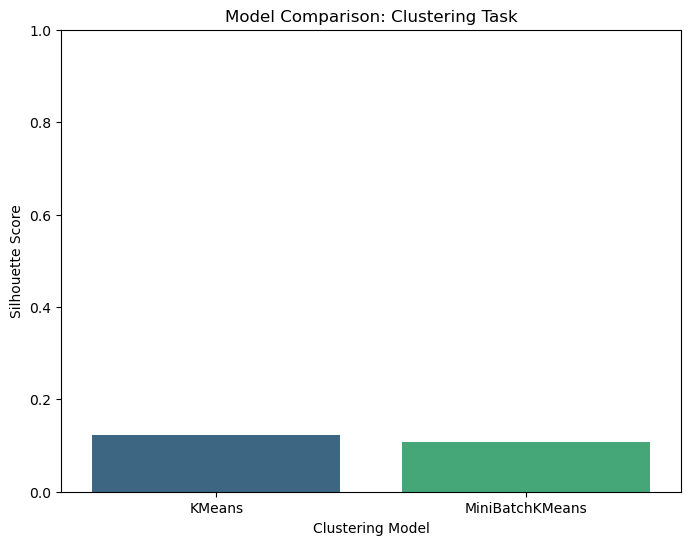

In [57]:
# Comparison plot for Clustering
clustering_models = ['KMeans', 'MiniBatchKMeans']
silhouette_scores = [silhouette_avg, silhouette_avg_mb_kmeans]

plt.figure(figsize=(8, 6))
sns.barplot(x=clustering_models, y=silhouette_scores, palette='viridis')
plt.title('Model Comparison: Clustering Task')
plt.ylabel('Silhouette Score')
plt.xlabel('Clustering Model')
plt.ylim(0, 1)  
plt.show()